In [1]:
!pip install pandas==0.22.0
!pip install numpy==1.14.6
!pip install matplotlib==2.1.2

▲库的版本变更

In [2]:
import sys
import pandas
import numpy
import matplotlib
print('python version : ', sys.version_info[0:3])
print('pandas version : ', pandas.__version__)
print('numpy version : ', numpy.__version__)
print('matplotlib version : ', matplotlib.__version__)

python version :  (3, 6, 9)
pandas version :  0.22.0
numpy version :  1.14.6
matplotlib version :  2.1.2


▲Python和库的版本输出

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


▲预先执行的代码

In [0]:
domain = 'https://archive.ics.uci.edu/'
path = 'ml/machine-learning-databases/00352/'
file = 'Online%20Retail.xlsx'
retail = pd.read_excel(domain + path + file)

▲ 程序清单 9.65 : read_excel函数

In [5]:
retail.shape

(541909, 8)

In [6]:
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


▲ 程序清单9.66:shape属性和head方法

In [7]:
retail['Total'] = retail['Quantity'] * retail['UnitPrice']
retail[['Quantity','UnitPrice','Total']][0:5]

,Quantity,UnitPrice,Total
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


▲程序清单9.67:系列之间的运算

In [8]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
Total          541909 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


▲程序清单9.68:数据帧的info方法

In [9]:
cols = ['Quantity','UnitPrice','Total']
retail[cols].describe()

,Quantity,UnitPrice,Total
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,17.987795
std,218.081158,96.759853,378.810824
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.400000
50%,3.000000,2.080000,9.750000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


▲ 程序清单9.69:数据帧的describe方法(数值数据)

In [10]:
cols = ['InvoiceNo','StockCode','Description','Country']
retail[cols].describe()

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


▲ 程序清单9.70:数据帧的方法(目标数据)

In [11]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total               0
dtype: int64

▲ 程序清单9.71:isna方法和sum方法

In [12]:
retail.duplicated(keep='first').sum()

5268

▲ 程序清单9.72:duplicated方法和sum方法

In [13]:
cond = retail['Description'].isna() == True
retail[cond]['Total'].describe()

count    1454.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Total, dtype: float64

In [14]:
retail[cond][0:3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0


▲程序清单9.73:列描述的缺失值

In [15]:
retail = retail.dropna(axis=0, subset=['Description'])
retail.shape

(540455, 9)

▲ 程序清单9.74:dropna方法

In [16]:
tcond = retail['CustomerID'].isna() == True
fcond = retail['CustomerID'].isna() == False
cst = retail[tcond][['Total']].describe()
cst.columns = ['nan']
cst['non-nan'] = retail[fcond]['Total'].describe()
cst

,nan,non-nan
count,133626.000000,406829.000000
mean,10.833836,20.401854
std,158.821030,427.591718
min,-17836.460000,-168469.600000
25%,2.490000,4.200000
50%,4.960000,11.100000
75%,10.790000,19.500000
max,13541.330000,168469.600000


▲ 程序清单9.75:摘要统计量的比较

In [17]:
retail[retail.duplicated(keep=False) == True][2:4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25


▲ 程序清单9.76:根据duplicated方法参照

In [18]:
retail = retail.drop_duplicates()
retail.duplicated().sum()

0

▲ 程序清单9.77:drop_duplicates方法

In [19]:
qcond = retail['Quantity'] <= 0
ucond = retail['UnitPrice'] <= 0
               
print('Quantity在0以下 :', retail[qcond].shape[0])
print('UnitPrice低于0 :', retail[ucond].shape[0])
print('两个项目中有一个低于0 :',retail[(qcond)|(ucond)].shape[0])
print('两个项目在0以下 :',retail[(qcond)&(ucond)].shape[0])

Quantity在0以下 : 9725
UnitPrice低于0 : 1058
两个项目中有一个低于0 : 10309
两个项目在0以下 : 474


▲ 程序清单9.78:根据bool类型的值参考

In [20]:
retail[qcond].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80


▲ 程序清单9.79:列Quantity0以下行的参考

In [21]:
icond = retail['InvoiceNo'].str.contains(pat='C', na=False)
icond.sum()

9251

▲ 程序清单9.80:str属性和contains方法

In [22]:
retail[(qcond)&(icond)].shape[0]

9251

▲ 程序清单9.81:根据条件参照①

In [23]:
retail[(qcond)&(icond == False)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom,-0.0
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom,-0.0
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom,-0.0
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom,-0.0
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom,-0.0


▲ 程序清单9.82:根据条件参照②

In [24]:
retail[(qcond)&(icond == False)]['Description'].value_counts()[0:10]

check                     120
damages                    45
damaged                    42
?                          41
sold as set on dotcom      20
Damaged                    14
Unsaleable, destroyed.      9
thrown away                 9
??                          7
wet damaged                 5
Name: Description, dtype: int64

▲ 程序清单9.83:根据条件的引用和value_counts方法①

In [25]:
retail[(icond == True)]['Description'].value_counts()[0:10]

Manual                               244
REGENCY CAKESTAND 3 TIER             180
POSTAGE                              126
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      73
SAMPLES                               60
ROSES REGENCY TEACUP AND SAUCER       54
STRAWBERRY CERAMIC TRINKET BOX        54
RECIPE BOX PANTRY YELLOW DESIGN       47
Name: Description, dtype: int64

▲ 程序清单9.84:根据条件的引用和value_counts方法②

In [26]:
acond = retail['InvoiceNo'].str.contains(pat='[a-zA-Z]', na=False)
retail[(icond == False)&(acond == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06


▲ 程序清单9.85:str属性和contains方法

In [27]:
tcond = retail['Total'] <= 0
retail['Irregular'] = 0
retail.loc[(acond)|(tcond), 'Irregular'] = 1
retail['Irregular'].sum()

10310

▲ 程序清单9.86:添加表示特殊交易的列Irregular

In [28]:
g = retail.groupby(['InvoiceNo'])['CustomerID'].nunique()
g.sort_values(ascending=False)[0:5]

InvoiceNo
C581569    1
555845     1
555847     1
555848     1
555849     1
Name: CustomerID, dtype: int64

▲ 程序清单9.87:groupby方法nunique方法(InvoiceNo和CustomerID)

In [29]:
g = retail.groupby(['StockCode'])['Description'].nunique()
g.sort_values(ascending=False)[0:5]

StockCode
20713    8
23084    7
85175    6
21830    6
23343    5
Name: Description, dtype: int64

▲ 程序清单9.88:groupby方法nunique方法(StockCode和Description)

In [30]:
retail[retail['StockCode'] == 20713]['Description'].value_counts()

JUMBO BAG OWLS                  668
wrongly coded 23343               1
wrongly marked. 23343 in box      1
Marked as 23343                   1
Found                             1
wrongly marked 23343              1
wrongly coded-23343               1
found                             1
Name: Description, dtype: int64

▲ 程序清单9.89:根据条件的引用和value_counts方法

In [31]:
g[g > 1].shape

(650,)

▲程序清单9.90:根据条件的引用和shape属性

In [32]:
retail['InvoiceDate'].describe()

count                  535187
unique                  22309
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

▲ 程序清单9.91:系列describe方法

In [33]:
reg = retail['Irregular'] == 0
irr = retail['Irregular'] == 1
print('全部交易件数 : ', retail.shape[0])
print('常规交易 : ', reg.sum())
print('非常规交易 : ', irr.sum())

全部交易件数 :  535187
常规交易 :  524877
非常规交易:  10310


▲程序清单9.92:根据条件参照

In [34]:
grp = retail.groupby('StockCode')
grp = grp[['Total','Quantity']].sum()
grp.sort_values(by='Total', ascending=False)[0:5]

,Total,Quantity
StockCode,,
DOT,206245.48,707
22423,164459.49,12954
47566,98243.88,18010
85123A,97838.45,38811
85099B,92175.79,47260


▲ 程序清单9.93:总交易金额高的商品

In [35]:
scond = retail['StockCode'] == 'DOT'
retail[scond][0:3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Irregular
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,0
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,0
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,0


In [36]:
retail[scond]['CustomerID'].value_counts(dropna=False)

NaN         693
 14096.0     16
Name: CustomerID, dtype: int64

▲ 程序清单9.94:根据条件的引用和value_counts方法

In [37]:
grp = retail.groupby('CustomerID')
grp['Total'].sum().sort_values(ascending=False).iloc[0:5]

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
14911.0    132458.73
12415.0    123725.45
Name: Total, dtype: float64

▲ リスト 9.95 : 取引金額の合計が高い顧客番号

In [38]:
grp = retail.groupby('InvoiceNo')
grp = grp[['Total','Quantity']].sum()
grp.sort_values(by='Total', ascending=False).iloc[0:5]

,Total,Quantity
InvoiceNo,,
581483,168469.60,80995
541431,77183.60,74215
574941,52940.94,14149
576365,50653.91,13956
556444,38970.00,60


▲ 程序清单9.96:交易金额合计较高的账单号码

In [39]:
grp = retail.groupby(['Country','Irregular'])
grp = round(grp['Total'].sum(), 2)
grp = grp.reset_index()
grp = grp.pivot(index='Country', columns='Irregular', values='Total')
grp.sort_values(by=0, ascending=False)[0:10]

Irregular,0,1
Country,,
United Kingdom,8990682.03,-823553.85
Netherlands,285446.34,-784.80
EIRE,283140.52,-20147.14
Germany,228678.40,-7168.93
France,209625.37,-12308.26
Australia,138453.81,-1444.04
Spain,61558.56,-6802.53
Switzerland,57067.60,-704.55
Belgium,41196.34,-285.38


▲ 程序清单9.97:国别、交易类别的交易合计金额

In [40]:
grp.sort_values(by=1, ascending=True)[0:10]

Irregular,0,1
Country,,
United Kingdom,8990682.03,-823553.85
EIRE,283140.52,-20147.14
France,209625.37,-12308.26
Singapore,21279.29,-12158.90
Germany,228678.40,-7168.93
Spain,61558.56,-6802.53
Hong Kong,15483.00,-5574.76
Portugal,33683.05,-4380.08
Japan,37416.37,-2075.75


▲ 程序清单9.98:sort_values方法和by参数

In [41]:
round(retail[irr].shape[0] / retail.shape[0] * 100, 3)

1.926

▲ 程序清单9.99:非常规交易比例

In [42]:
time = retail.copy()
time.index = time['InvoiceDate']
time.drop(columns='InvoiceDate')
time.index[0:3]

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00'],
              dtype='datetime64[ns]', name='InvoiceDate', freq=None)

▲程序清单9.100 向索引标签添加程序清单9.100:DatetimeIndex

In [43]:
time['Year'] = time.index.year
time['Month'] = time.index.month
time['Day'] = time.index.day
time['Weekday'] = time.index.weekday_name
time['Hour'] = time.index.hour
time.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Irregular,Year,Month,Day,Weekday,Hour
InvoiceDate,,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,2010,12,1,Wednesday,8
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,2010,12,1,Wednesday,8
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,2010,12,1,Wednesday,8


▲ 程序清单9.101:添加时间序列数据列

In [44]:
mt = time.groupby(['Year','Month'])[['Total']].sum()
mt

Total
Year Month             
2010 12      746723.610
2011 1       558448.560
     2       497026.410
     3       682013.980
     4       492367.841
     5       722094.100
     6       689977.230
     7       680156.991
     8       681386.460
     9      1017596.682
     10     1069368.230
     11     1456145.800
     12      432701.060

▲ 程序清单9.102:各月销售合计金额

In [45]:
bdays = time.groupby(['Year','Month'])[['Day']].nunique()
mt['Bdays'] = bdays.values
mt['avg_bdays'] = round(mt['Total'] / mt['Bdays'], 2)
mt

Total  Bdays  avg_bdays
Year Month                               
2010 12      746723.610     20   37336.18
2011 1       558448.560     24   23268.69
     2       497026.410     24   20709.43
     3       682013.980     27   25259.78
     4       492367.841     21   23446.09
     5       722094.100     25   28883.76
     6       689977.230     26   26537.59
     7       680156.991     26   26159.88
     8       681386.460     26   26207.17
     9      1017596.682     26   39138.33
     10     1069368.230     26   41129.55
     11     1456145.800     26   56005.61
     12      432701.060      8   54087.63

▲ 程序清单9.103:按年月计算的1个工作日的平均销售合计金额

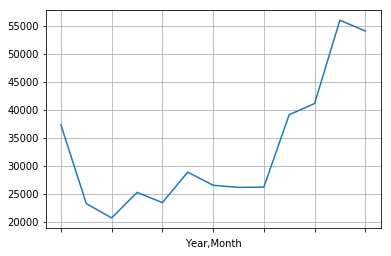

In [46]:
mt['avg_bdays'].plot(kind='line', grid=True)

▲ 程序清单9.104:利用plot方法绘制线状图

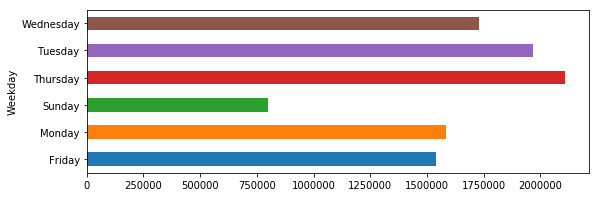

In [47]:
time.groupby(['Weekday'])['Total'].sum().plot(kind='barh', figsize=(9,3))

▲ 程序清单9.105:groupby方法和plot方法

In [48]:
print(time['Hour'].min())
print(time['Hour'].max())

6
20


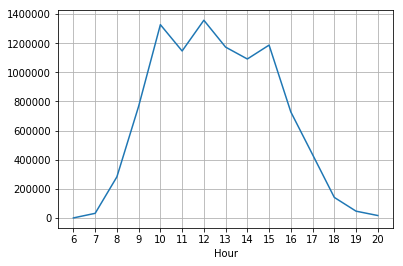

In [49]:
xticks = np.arange(6,21)
time.groupby(['Hour'])['Total'].sum().plot(grid=True, xticks=xticks)

▲ 程序清单9.106:groupby方法和plot方法

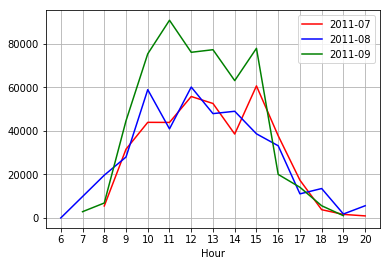

In [50]:
grp = time.groupby(['Month','Hour'])['Quantity'].sum()
ax = grp[7].plot(grid=True, xticks=xticks, c='r', legend=True, label='2011-07')
grp[8].plot(grid=True, c='b', ax=ax, legend=True, label='2011-08')
grp[9].plot(grid=True, c='g', ax=ax, legend=True, label='2011-09')

▲ 程序清单9.107:plot方法与ax参数